# Read the csv files into dataframes

In [1]:
import numpy as np
import pandas as pd

bill_amount = pd.read_csv("bill_amount.csv",header=0,index_col = False)
bill_patient = pd.read_csv("bill_id.csv",header=0,index_col = False)
patient_clinical = pd.read_csv("clinical_data.csv",header=0,index_col = False)
patient_demographics = pd.read_csv("demographics.csv",header=0, index_col = False)

# 1. Explore the datasets

## bill_amount

In [2]:
print(bill_amount.head(),'\n')
print(bill_amount.dtypes,'\n')
print(bill_amount.describe(),'\n')
print(bill_amount.isnull().sum(),'\n')

      bill_id       amount
0    40315104  1552.634830
1  2660045161  1032.011951
2  1148334643  6469.605351
3  3818426276   755.965425
4  9833541918   897.347816 

bill_id      int64
amount     float64
dtype: object 

            bill_id        amount
count  1.360000e+04  13600.000000
mean   5.007147e+09   5464.767783
std    2.885919e+09   7717.479509
min    5.584120e+05     79.496707
25%    2.485853e+09    950.689008
50%    4.992958e+09   1516.951136
75%    7.524563e+09   7307.056573
max    9.999633e+09  81849.751340 

bill_id    0
amount     0
dtype: int64 



## bill_patient

In [3]:
print(bill_patient.head(),'\n')
print(bill_patient.shape,'\n')
print(bill_patient.dtypes,'\n')
print(bill_patient.isnull().sum(),'\n')

      bill_id                        patient_id date_of_admission
0  7968360812  1d21f2be18683991eb93d182d6b2d220        2011-01-01
1  6180579974  62bdca0b95d97e99e1c712048fb9fd09        2011-01-01
2  7512568183  1d21f2be18683991eb93d182d6b2d220        2011-01-01
3  3762633379  62bdca0b95d97e99e1c712048fb9fd09        2011-01-01
4  7654730355  1d21f2be18683991eb93d182d6b2d220        2011-01-01 

(13600, 3) 

bill_id               int64
patient_id           object
date_of_admission    object
dtype: object 

bill_id              0
patient_id           0
date_of_admission    0
dtype: int64 



In [4]:
print(bill_patient.groupby('patient_id')['date_of_admission'].nunique().describe(),'\n') # There are 3000 different patients, some patient has more than one treatment records
print(bill_patient.groupby('bill_id')[['patient_id','date_of_admission']].nunique().describe(),'\n') # Each bill records correspond to a unique combination of (patient_id, date_of_admission). let us define it as a "treatment"
print(bill_patient.groupby(['patient_id','date_of_admission'])['bill_id'].nunique().describe(),'\n') # Each treatment has 4 bill records, there are 3400 treatment records

count    3000.000000
mean        1.133333
std         0.360923
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         4.000000
Name: date_of_admission, dtype: float64 

       patient_id  date_of_admission
count     13600.0            13600.0
mean          1.0                1.0
std           0.0                0.0
min           1.0                1.0
25%           1.0                1.0
50%           1.0                1.0
75%           1.0                1.0
max           1.0                1.0 

count    3400.0
mean        4.0
std         0.0
min         4.0
25%         4.0
50%         4.0
75%         4.0
max         4.0
Name: bill_id, dtype: float64 



## patient_clinical

In [5]:
print(patient_clinical.shape,'\n')
print(patient_clinical.dtypes,'\n')
print(patient_clinical.isnull().sum(),'\n')
print(patient_clinical['medical_history_3'].unique())

(3400, 26) 

id                     object
date_of_admission      object
date_of_discharge      object
medical_history_1       int64
medical_history_2     float64
medical_history_3      object
medical_history_4       int64
medical_history_5     float64
medical_history_6       int64
medical_history_7       int64
preop_medication_1      int64
preop_medication_2      int64
preop_medication_3      int64
preop_medication_4      int64
preop_medication_5      int64
preop_medication_6      int64
symptom_1               int64
symptom_2               int64
symptom_3               int64
symptom_4               int64
symptom_5               int64
lab_result_1          float64
lab_result_2          float64
lab_result_3          float64
weight                float64
height                float64
dtype: object 

id                      0
date_of_admission       0
date_of_discharge       0
medical_history_1       0
medical_history_2     233
medical_history_3       0
medical_history_4       0
medical_h

In [7]:
# convert the "No" in medical_history_3 to 0, "Yes" to 1
patient_clinical = patient_clinical.set_value(patient_clinical[patient_clinical['medical_history_3'] == 'No'].index,'medical_history_3', '0')
patient_clinical = patient_clinical.set_value(patient_clinical[patient_clinical['medical_history_3'] == 'Yes'].index,'medical_history_3', '1')
# convert medical_history_3 to int
patient_clinical = patient_clinical.astype({'medical_history_3': np.int64})

C:\Users\wangx\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\wangx\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
print(patient_clinical.dtypes)
print(patient_clinical.describe())
print(len(patient_clinical[['id','date_of_admission']].drop_duplicates()))  
# Same as the length of the dataframe, hence each treatment has only one clinical data record

id                     object
date_of_admission      object
date_of_discharge      object
medical_history_1       int64
medical_history_2     float64
medical_history_3       int64
medical_history_4       int64
medical_history_5     float64
medical_history_6       int64
medical_history_7       int64
preop_medication_1      int64
preop_medication_2      int64
preop_medication_3      int64
preop_medication_4      int64
preop_medication_5      int64
preop_medication_6      int64
symptom_1               int64
symptom_2               int64
symptom_3               int64
symptom_4               int64
symptom_5               int64
lab_result_1          float64
lab_result_2          float64
lab_result_3          float64
weight                float64
height                float64
dtype: object
       medical_history_1  medical_history_2  medical_history_3  \
count        3400.000000        3167.000000        3400.000000   
mean            0.169118           0.311336           0.136176   
std     

<IPython.core.display.Javascript object>


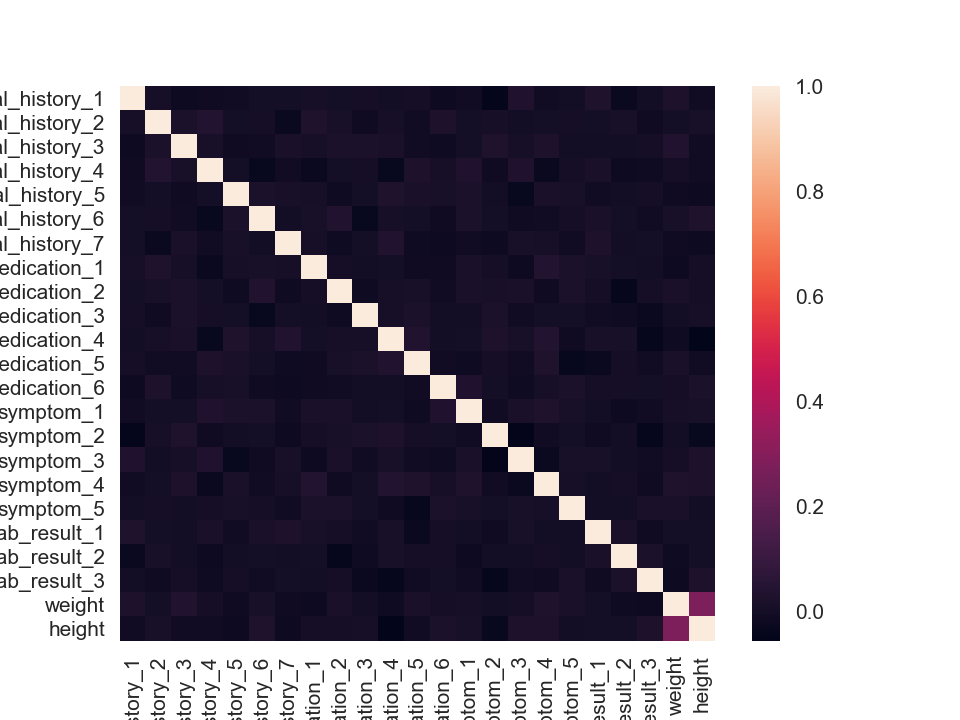

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Explore the relationship among the clinical data, 
# in order to check whether the missing values in medical_history_2 and medical_history_5 can be derived from other metrics.
features = patient_clinical.drop(['id','date_of_admission','date_of_discharge'],axis=1).columns

%matplotlib notebook

plt.figure()

corr = patient_clinical.dropna()[features].corr()
sns_plot = sns.heatmap(corr, xticklabels = corr.columns.values, yticklabels = corr.columns.values)
# Hence the missing values could not be derived from other metrics easily

## patient_demographics

In [10]:
print(patient_demographics.head(),'\n')
print(patient_demographics.shape,'\n')
print(patient_demographics.dtypes,'\n')
print(patient_demographics.isnull().sum(),'\n')
print(patient_demographics['gender'].unique(), patient_demographics['race'].unique(), patient_demographics['resident_status'].unique())

                         patient_id  gender     race    resident_status  \
0  fa2d818b2261e44e30628ad1ac9cc72c  Female   Indian        Singaporean   
1  5b6477c5de78d0b138e3b0c18e21d0ae       f  Chinese  Singapore citizen   
2  320aa16c61937447fd6631bf635e7fde    Male  Chinese  Singapore citizen   
3  c7f3881684045e6c49020481020fae36    Male    Malay  Singapore citizen   
4  541ad077cb4a0e64cc422673afe28aef       m  Chinese        Singaporean   

  date_of_birth  
0    1971-05-14  
1    1976-02-18  
2    1982-07-03  
3    1947-06-15  
4    1970-12-12   

(3000, 5) 

patient_id         object
gender             object
race               object
resident_status    object
date_of_birth      object
dtype: object 

patient_id         0
gender             0
race               0
resident_status    0
date_of_birth      0
dtype: int64 

['Female' 'f' 'Male' 'm'] ['Indian' 'Chinese' 'Malay' 'chinese' 'India' 'Others'] ['Singaporean' 'Singapore citizen' 'PR' 'Foreigner']


In [11]:
# Convert the 'f' and 'm' in gender to 'Female' and 'Male'
patient_demographics = patient_demographics.set_value(patient_demographics[patient_demographics['gender']=='f'].index,'gender', 'Female')
patient_demographics = patient_demographics.set_value(patient_demographics[patient_demographics['gender']=='m'].index,'gender', 'Male')

# Convert the 'India' and 'chinese' in race to 'Indian' and 'Chinese'
patient_demographics = patient_demographics.set_value(patient_demographics[patient_demographics['race']=='India'].index,'race', 'Indian')
patient_demographics = patient_demographics.set_value(patient_demographics[patient_demographics['race']=='chinese'].index,'race', 'Chinese')

# Convert the 'Singaporean' to 'Singapore citizen' in resident_status
patient_demographics=patient_demographics.set_value(patient_demographics[patient_demographics['resident_status']=='Singaporean'].index,'resident_status', 'Singapore citizen')

print(patient_demographics['gender'].unique(), patient_demographics['race'].unique(), patient_demographics['resident_status'].unique())

['Female' 'Male'] ['Indian' 'Chinese' 'Malay' 'Others'] ['Singapore citizen' 'PR' 'Foreigner']


C:\Users\wangx\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\wangx\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\wangx\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\wangx\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  import sys
C:\Users\wangx\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed

# 2. Join the datasets together

In [12]:
# Firstly, join the bill_amount and bill_patient, then calculate the cost of each treatment
bill = bill_amount.merge(bill_patient, left_on = 'bill_id', right_on = 'bill_id', how = 'inner')
#bill.head()

treatment_cost = bill.groupby(['patient_id','date_of_admission']).agg({'amount':sum})
#treatment_cost.head()

# Next, join the treatment_cost and clinical data
treatment = treatment_cost.merge(patient_clinical, left_index = True, right_on = ['id','date_of_admission'], how = 'inner')
#treatment.head()

# Lastly, join the treatment data and demographics data
cost_of_care = treatment.merge(patient_demographics, left_on = 'id', right_on = 'patient_id', how = 'inner')
cost_of_care.head()

,amount,id,date_of_admission,date_of_discharge,medical_history_1,medical_history_2,medical_history_3,medical_history_4,medical_history_5,medical_history_6,...,lab_result_1,lab_result_2,lab_result_3,weight,height,patient_id,gender,race,resident_status,date_of_birth
0,5190.566695,00225710a878eff524a1d13be817e8e2,2014-04-10,2014-04-22,0,0.0,0,0,0.0,0,...,13.4,27.9,96.0,66.9,155.0,00225710a878eff524a1d13be817e8e2,Female,Chinese,Singapore citizen,1983-01-16
1,22601.497872,0029d90eb654699c18001c17efb0f129,2012-11-07,2012-11-20,0,1.0,0,0,0.0,1,...,16.7,26.5,109.0,89.1,160.0,0029d90eb654699c18001c17efb0f129,Female,Chinese,Singapore citizen,1943-10-14
2,17447.181635,0040333abd68527ecb53e1db9073f52e,2013-01-19,2013-01-31,0,1.0,0,0,0.0,0,...,14.8,25.2,96.0,79.5,172.0,0040333abd68527ecb53e1db9073f52e,Male,Indian,Singapore citizen,1972-08-26
3,15285.883220,00473b58e3dc8ae37b3cb34069705083,2014-02-10,2014-02-15,1,0.0,0,0,0.0,0,...,14.9,28.7,122.0,81.1,160.0,00473b58e3dc8ae37b3cb34069705083,Female,Chinese,Singapore citizen,1976-07-23
4,73477.869010,0078662d1d983dde68ea057c42d5b5cf,2012-04-28,2012-05-10,0,1.0,0,0,0.0,1,...,14.2,27.2,89.0,74.7,173.0,0078662d1d983dde68ea057c42d5b5cf,Male,Malay,Foreigner,1942-10-19


## Create new features with existing metrics

In [13]:
cost_of_care['age'] = cost_of_care['date_of_admission'].str.slice(start=0,stop=4).astype('int') - cost_of_care['date_of_birth'].str.slice(start=0, stop=4).astype('int')

cost_of_care['duration'] = pd.to_datetime(cost_of_care['date_of_discharge']) - pd.to_datetime(cost_of_care['date_of_admission'])
cost_of_care['duration'] = cost_of_care['duration'].astype('<m8[D]').astype(np.int64)

## Missing Values

In [14]:
# calculate the percentage of records without missing values
print(len(cost_of_care.dropna())/len(cost_of_care))

# Drop the rows with missing values
cost = cost_of_care.dropna().astype({'medical_history_2':np.int64,'medical_history_5':np.int64})
cost.dtypes

0.8523529411764705


amount                float64
id                     object
date_of_admission      object
date_of_discharge      object
medical_history_1       int64
medical_history_2       int64
medical_history_3       int64
medical_history_4       int64
medical_history_5       int64
medical_history_6       int64
medical_history_7       int64
preop_medication_1      int64
preop_medication_2      int64
preop_medication_3      int64
preop_medication_4      int64
preop_medication_5      int64
preop_medication_6      int64
symptom_1               int64
symptom_2               int64
symptom_3               int64
symptom_4               int64
symptom_5               int64
lab_result_1          float64
lab_result_2          float64
lab_result_3          float64
weight                float64
height                float64
patient_id             object
gender                 object
race                   object
resident_status        object
date_of_birth          object
age                     int32
duration  

# 3. Fit a model to predict the cost of care

              lab_result_1  lab_result_2  lab_result_3    weight    height  \
lab_result_1      1.000000      0.016441     -0.011844 -0.000002  0.000211   
lab_result_2      0.016441      1.000000      0.017631 -0.017071  0.001040   
lab_result_3     -0.011844      0.017631      1.000000 -0.021717  0.025659   
weight           -0.000002     -0.017071     -0.021717  1.000000  0.278713   
height            0.000211      0.001040      0.025659  0.278713  1.000000   
age              -0.005315      0.008468      0.020845 -0.022825  0.011898   

                   age  
lab_result_1 -0.005315  
lab_result_2  0.008468  
lab_result_3  0.020845  
weight       -0.022825  
height        0.011898  
age           1.000000  


<IPython.core.display.Javascript object>


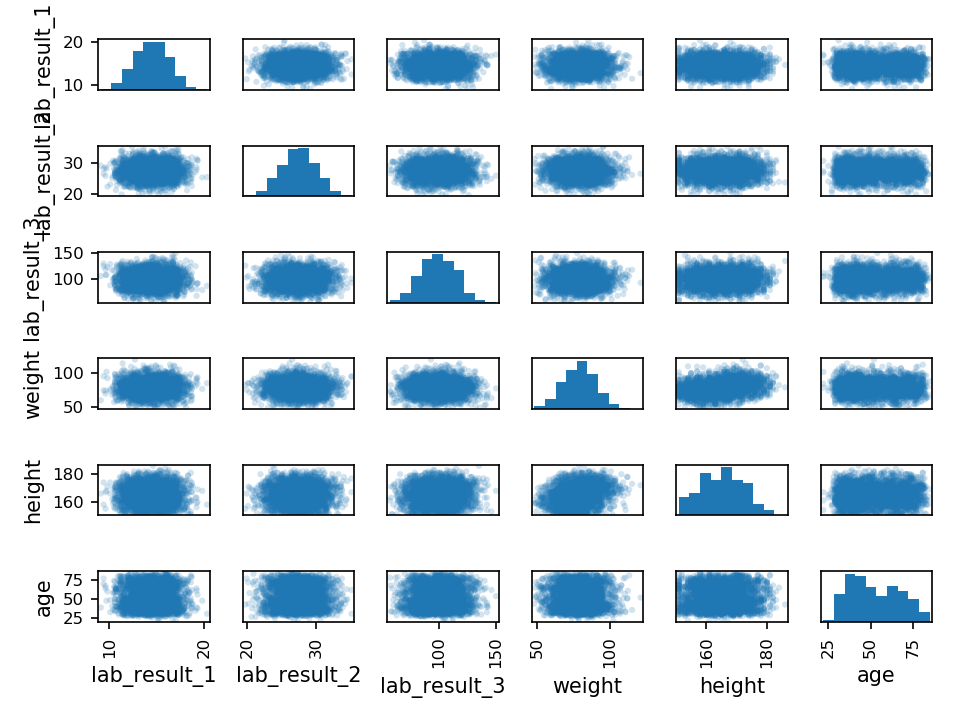

In [15]:
# Find correlations among the continuous variables
import matplotlib.pyplot as plt
%matplotlib notebook

continuous = ['lab_result_1','lab_result_2','lab_result_3','weight','height','age']

df = cost[continuous]
print(df.corr())

axes = pd.plotting.scatter_matrix(df, alpha=0.2)
plt.tight_layout()

# The features are not closely related to each other


In [16]:
from sklearn.model_selection import train_test_split

cost_reg = pd.get_dummies(cost.drop(['id','date_of_admission','date_of_discharge','patient_id','date_of_birth'],axis=1),drop_first=True)

y = cost_reg['amount']
X = cost_reg.drop('amount',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=2018)

In [17]:
from sklearn.tree import DecisionTreeRegressor

Tree = DecisionTreeRegressor(random_state=2018).fit(X_train,y_train)

In [18]:
importances = pd.Series(Tree.feature_importances_, index=X.columns).sort_values(ascending = False)

print(importances,'\n')
print(Tree.score(X_test, y_test))

symptom_5                            0.263909
race_Malay                           0.183281
resident_status_PR                   0.114984
resident_status_Singapore citizen    0.109564
age                                  0.108851
medical_history_1                    0.045303
weight                               0.028957
symptom_3                            0.023699
symptom_4                            0.015591
symptom_2                            0.015549
race_Indian                          0.011676
lab_result_2                         0.010267
medical_history_6                    0.010044
duration                             0.009754
symptom_1                            0.009118
lab_result_3                         0.008816
lab_result_1                         0.007883
height                               0.006006
preop_medication_1                   0.002866
medical_history_4                    0.002388
medical_history_7                    0.002264
preop_medication_4                

## Fit a Random Forest Regressor using the features with importances larger than 0.01

In [19]:
features = ['symptom_5','race','resident_status','age','medical_history_1','weight','symptom_3','symptom_4',\
            'symptom_2','lab_result_2','medical_history_6']

In [20]:
from sklearn.ensemble import RandomForestRegressor

X = pd.get_dummies(cost[features], drop_first=True)
y = cost['amount']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=2018)

RF = RandomForestRegressor(n_estimators=10,random_state=2018).fit(X_train, y_train)

print(pd.Series(RF.feature_importances_,index=X.columns).sort_values(ascending=False),'\n')
print(RF.score(X_test,y_test))
# Hence the most important drivers for cost of care are symptom_5, race, age at the date of admission, and resident status 

symptom_5                            0.263937
race_Malay                           0.177559
age                                  0.135032
resident_status_Singapore citizen    0.111297
resident_status_PR                   0.098655
weight                               0.049713
medical_history_1                    0.041394
lab_result_2                         0.027879
symptom_3                            0.025007
symptom_2                            0.020888
symptom_4                            0.017579
race_Indian                          0.014982
medical_history_6                    0.013973
race_Others                          0.002106
dtype: float64 

0.8883322647738813


# 4. Cost of Care and symptom_5, race, age, and resident status 

## Cost of Care and Symptom_5

<IPython.core.display.Javascript object>


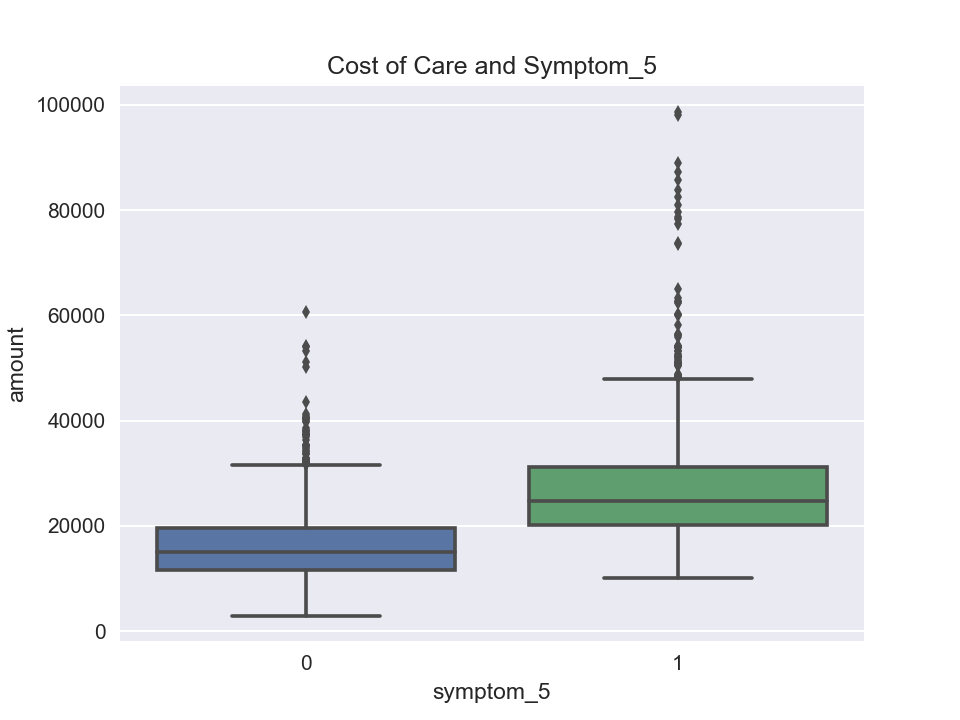

In [21]:
import seaborn as sns
sns.set()

plt.figure()

sns_symptom_5 = sns.boxplot(x = 'symptom_5', y = 'amount', data = cost).set_title('Cost of Care and Symptom_5')
#sns_symptom_5.get_figure().savefig('symptom 5 and cost.png')

<IPython.core.display.Javascript object>


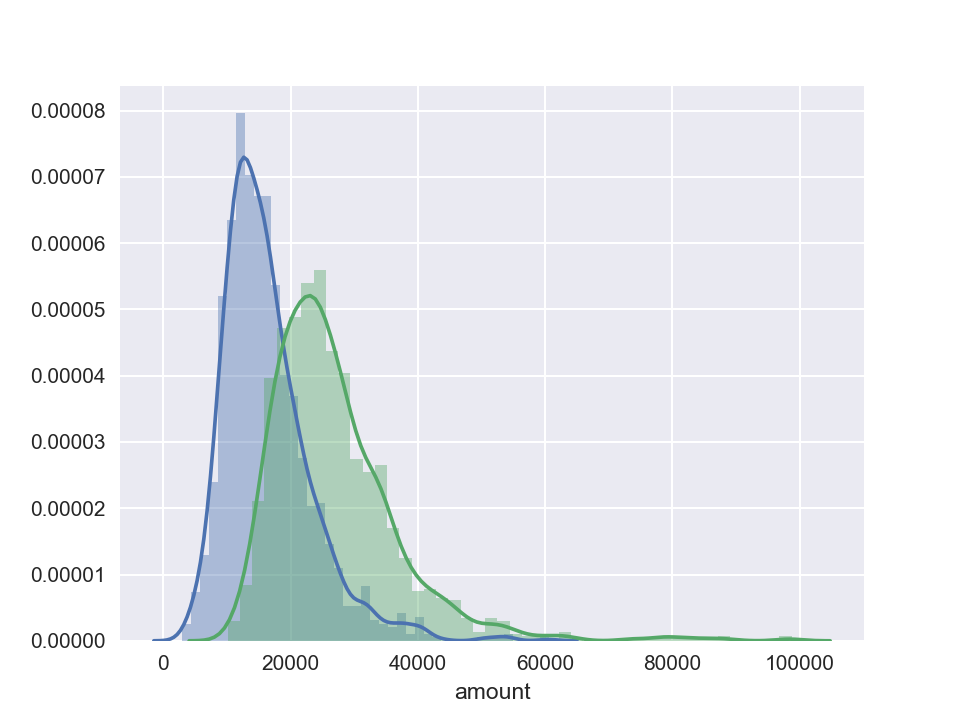

C:\Users\wangx\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\wangx\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


In [22]:
import seaborn as sns

plt.figure()

sns.distplot(cost[cost['symptom_5']==0].amount, norm_hist = False)
sns.distplot(cost[cost['symptom_5']==1].amount, norm_hist = False)

#plt.savefig('symptom_5 hist.png')

## Cost of Care and Race

<IPython.core.display.Javascript object>


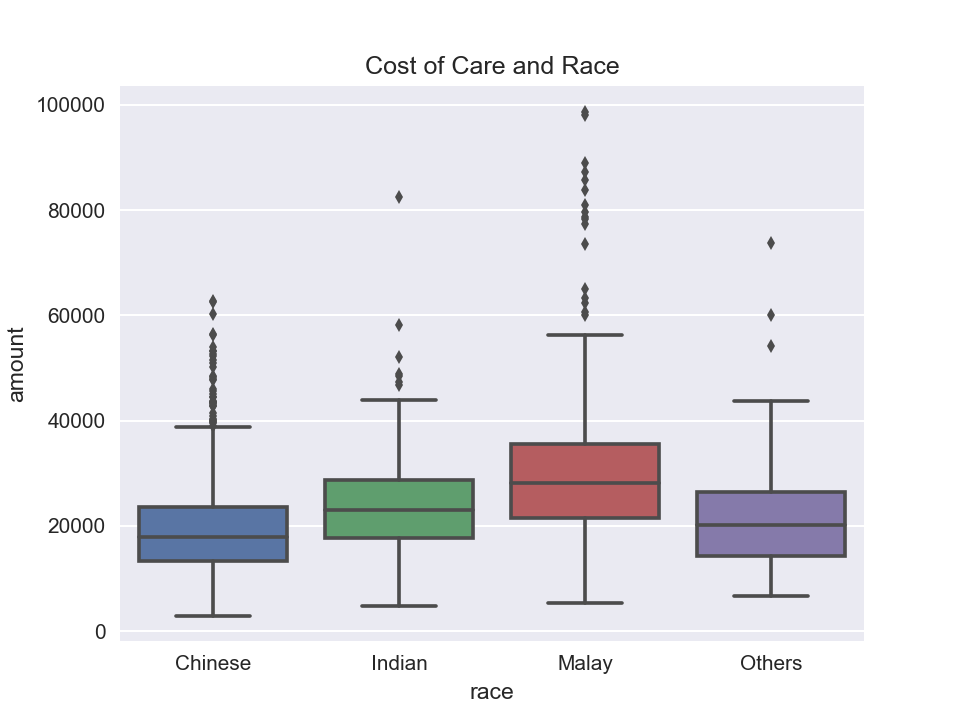

In [23]:
plt.figure()

sns_race = sns.boxplot(x='race',y='amount',data=cost).set_title('Cost of Care and Race')

#sns_race.get_figure().savefig('race and cost.png')

<IPython.core.display.Javascript object>


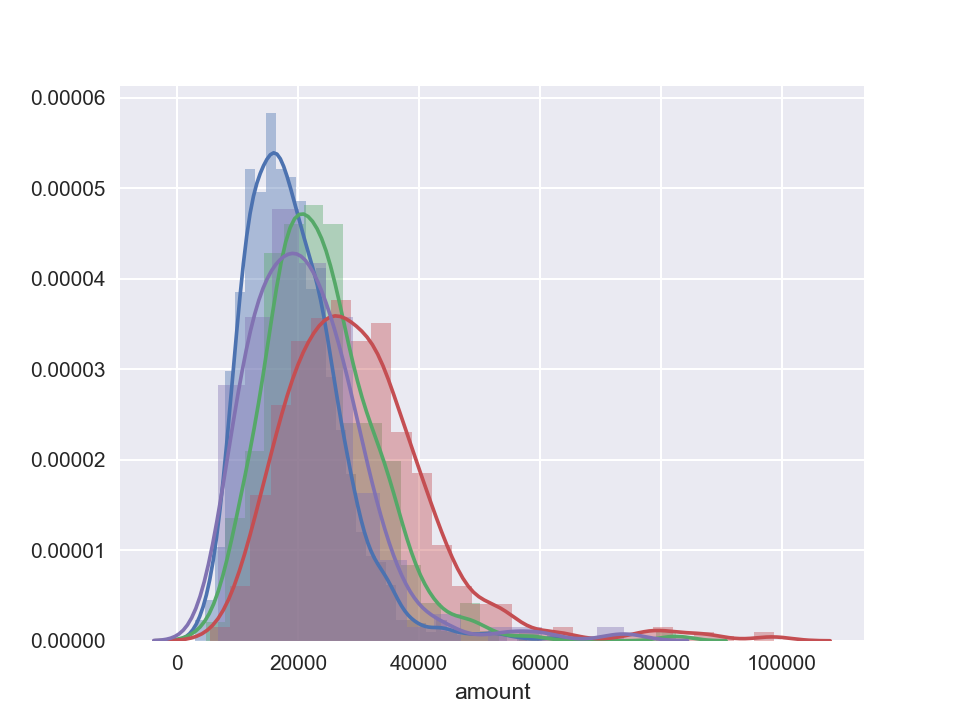

C:\Users\wangx\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\wangx\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\wangx\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\wangx\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


In [24]:
plt.figure()

sns.distplot(cost[cost['race']=='Chinese'].amount, norm_hist = True)
sns.distplot(cost[cost['race']=='Indian'].amount, norm_hist = True)
sns.distplot(cost[cost['race']=='Malay'].amount, norm_hist = True)
sns.distplot(cost[cost['race']=='Others'].amount, norm_hist = True)

#plt.savefig('race hist.png')

## Cost of Care and Age

<IPython.core.display.Javascript object>


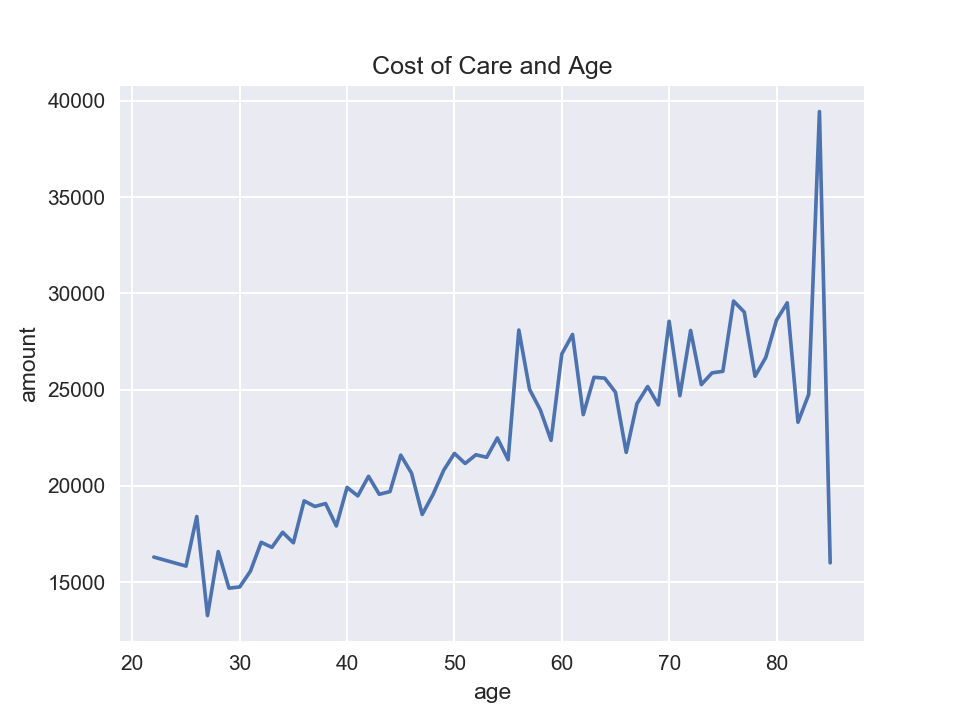

In [25]:
plt.figure()

plt.plot(cost.groupby('age').agg({'amount': np.mean}))

plt.xlabel('age')
plt.ylabel('amount')
plt.title('Cost of Care and Age');

#plt.savefig('age and cost.png')

## Cost of Care and Resident Status

<IPython.core.display.Javascript object>


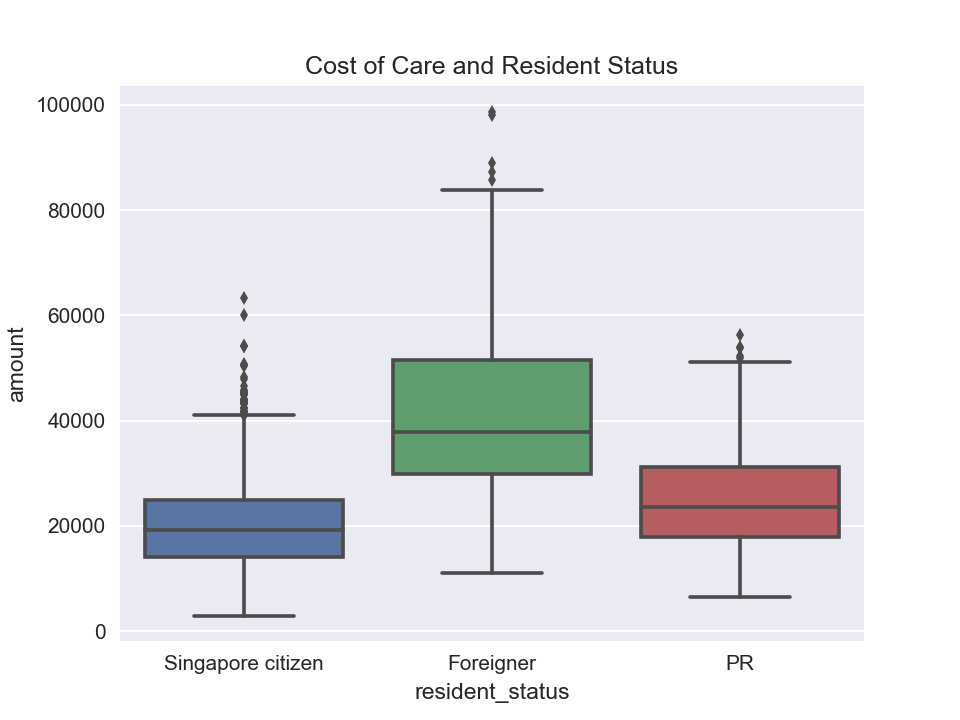

In [26]:
plt.figure()

sns_resident_status = sns.boxplot(x='resident_status',y='amount',data=cost).set_title('Cost of Care and Resident Status')

#sns_resident_status.get_figure().savefig('resident status and cost')

<IPython.core.display.Javascript object>


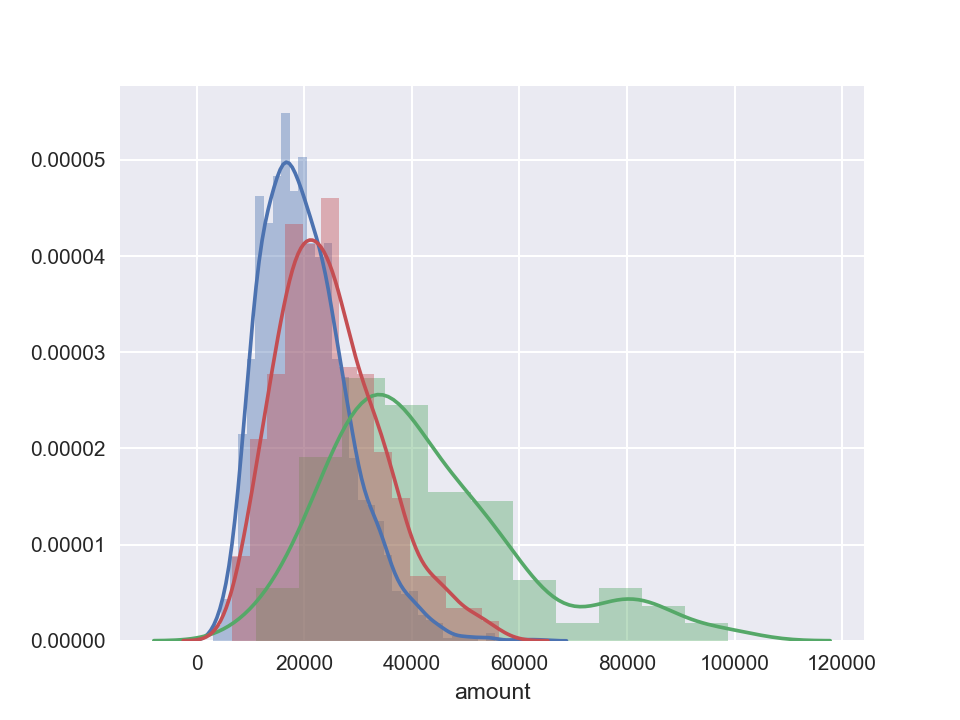

C:\Users\wangx\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\wangx\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\wangx\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


In [27]:
plt.figure()

sns.distplot(cost[cost['resident_status']=='Singapore citizen'].amount, norm_hist = False)
sns.distplot(cost[cost['resident_status']=='Foreigner'].amount, norm_hist = False)
sns.distplot(cost[cost['resident_status']=='PR'].amount, norm_hist = False)

#plt.savefig('resident status hist.png')